In [1]:
# Import modules and set up plotting
from python_scripts.support import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Define chain folder
chain_dir = os.path.join(os.getcwd(), 'chains/')

In [2]:
# First distributions: BOSS + Planck
posterior1 = loadMCSamples(file_root=chain_dir+'boss+base2018TTTEEE/posterior', settings={'ignore_rows':0.})
posterior1.name_tag = 'BOSS + Planck'
prior1 = loadMCSamples(file_root=chain_dir+'boss+base2018TTTEEE/prior', settings={'ignore_rows':0.})
prior1.name_tag = 'BOSS + Planck Prior'
# Get the parameter limits
param_limits1 = pd.read_csv(chain_dir+'boss+base2018TTTEEE/param_limits.csv', index_col=0)
# Convert to dictionary
param_limits1 = param_limits1.to_dict()
for key in param_limits1.keys():
    param_limits1[key] = (param_limits1[key][0], param_limits1[key][1])

# Second distributions: BOSS
posterior2 = loadMCSamples(file_root=chain_dir+'eftboss_wc_std/posterior', settings={'ignore_rows':0.})
posterior2.name_tag = 'BOSS + BBN'
prior2 = loadMCSamples(file_root=chain_dir+'eftboss_wc_std/prior', settings={'ignore_rows':0.})
prior2.name_tag = 'BOSS + BBN Prior'
# Get the parameter limits
param_limits2 = pd.read_csv(chain_dir+'eftboss_wc_std/param_limits.csv', index_col=0)
# Convert to dictionary
param_limits2 = param_limits2.to_dict()
for key in param_limits2.keys():
    param_limits2[key] = (param_limits2[key][0], param_limits2[key][1])

In [3]:
# Select the common parameters
params = [param for param in posterior1.getParamNames().list() if param in posterior2.getParamNames().list()]
params

['omega_b',
 'omega_cdm',
 'h',
 'ln10^{10}A_s',
 'n_s',
 'b1_hN',
 'c2_hN',
 'b1_hS',
 'c2_hS',
 'b1_lN',
 'c2_lN',
 'b1_lS',
 'c2_lS',
 'Omega_m',
 'A_s',
 'sigma8']

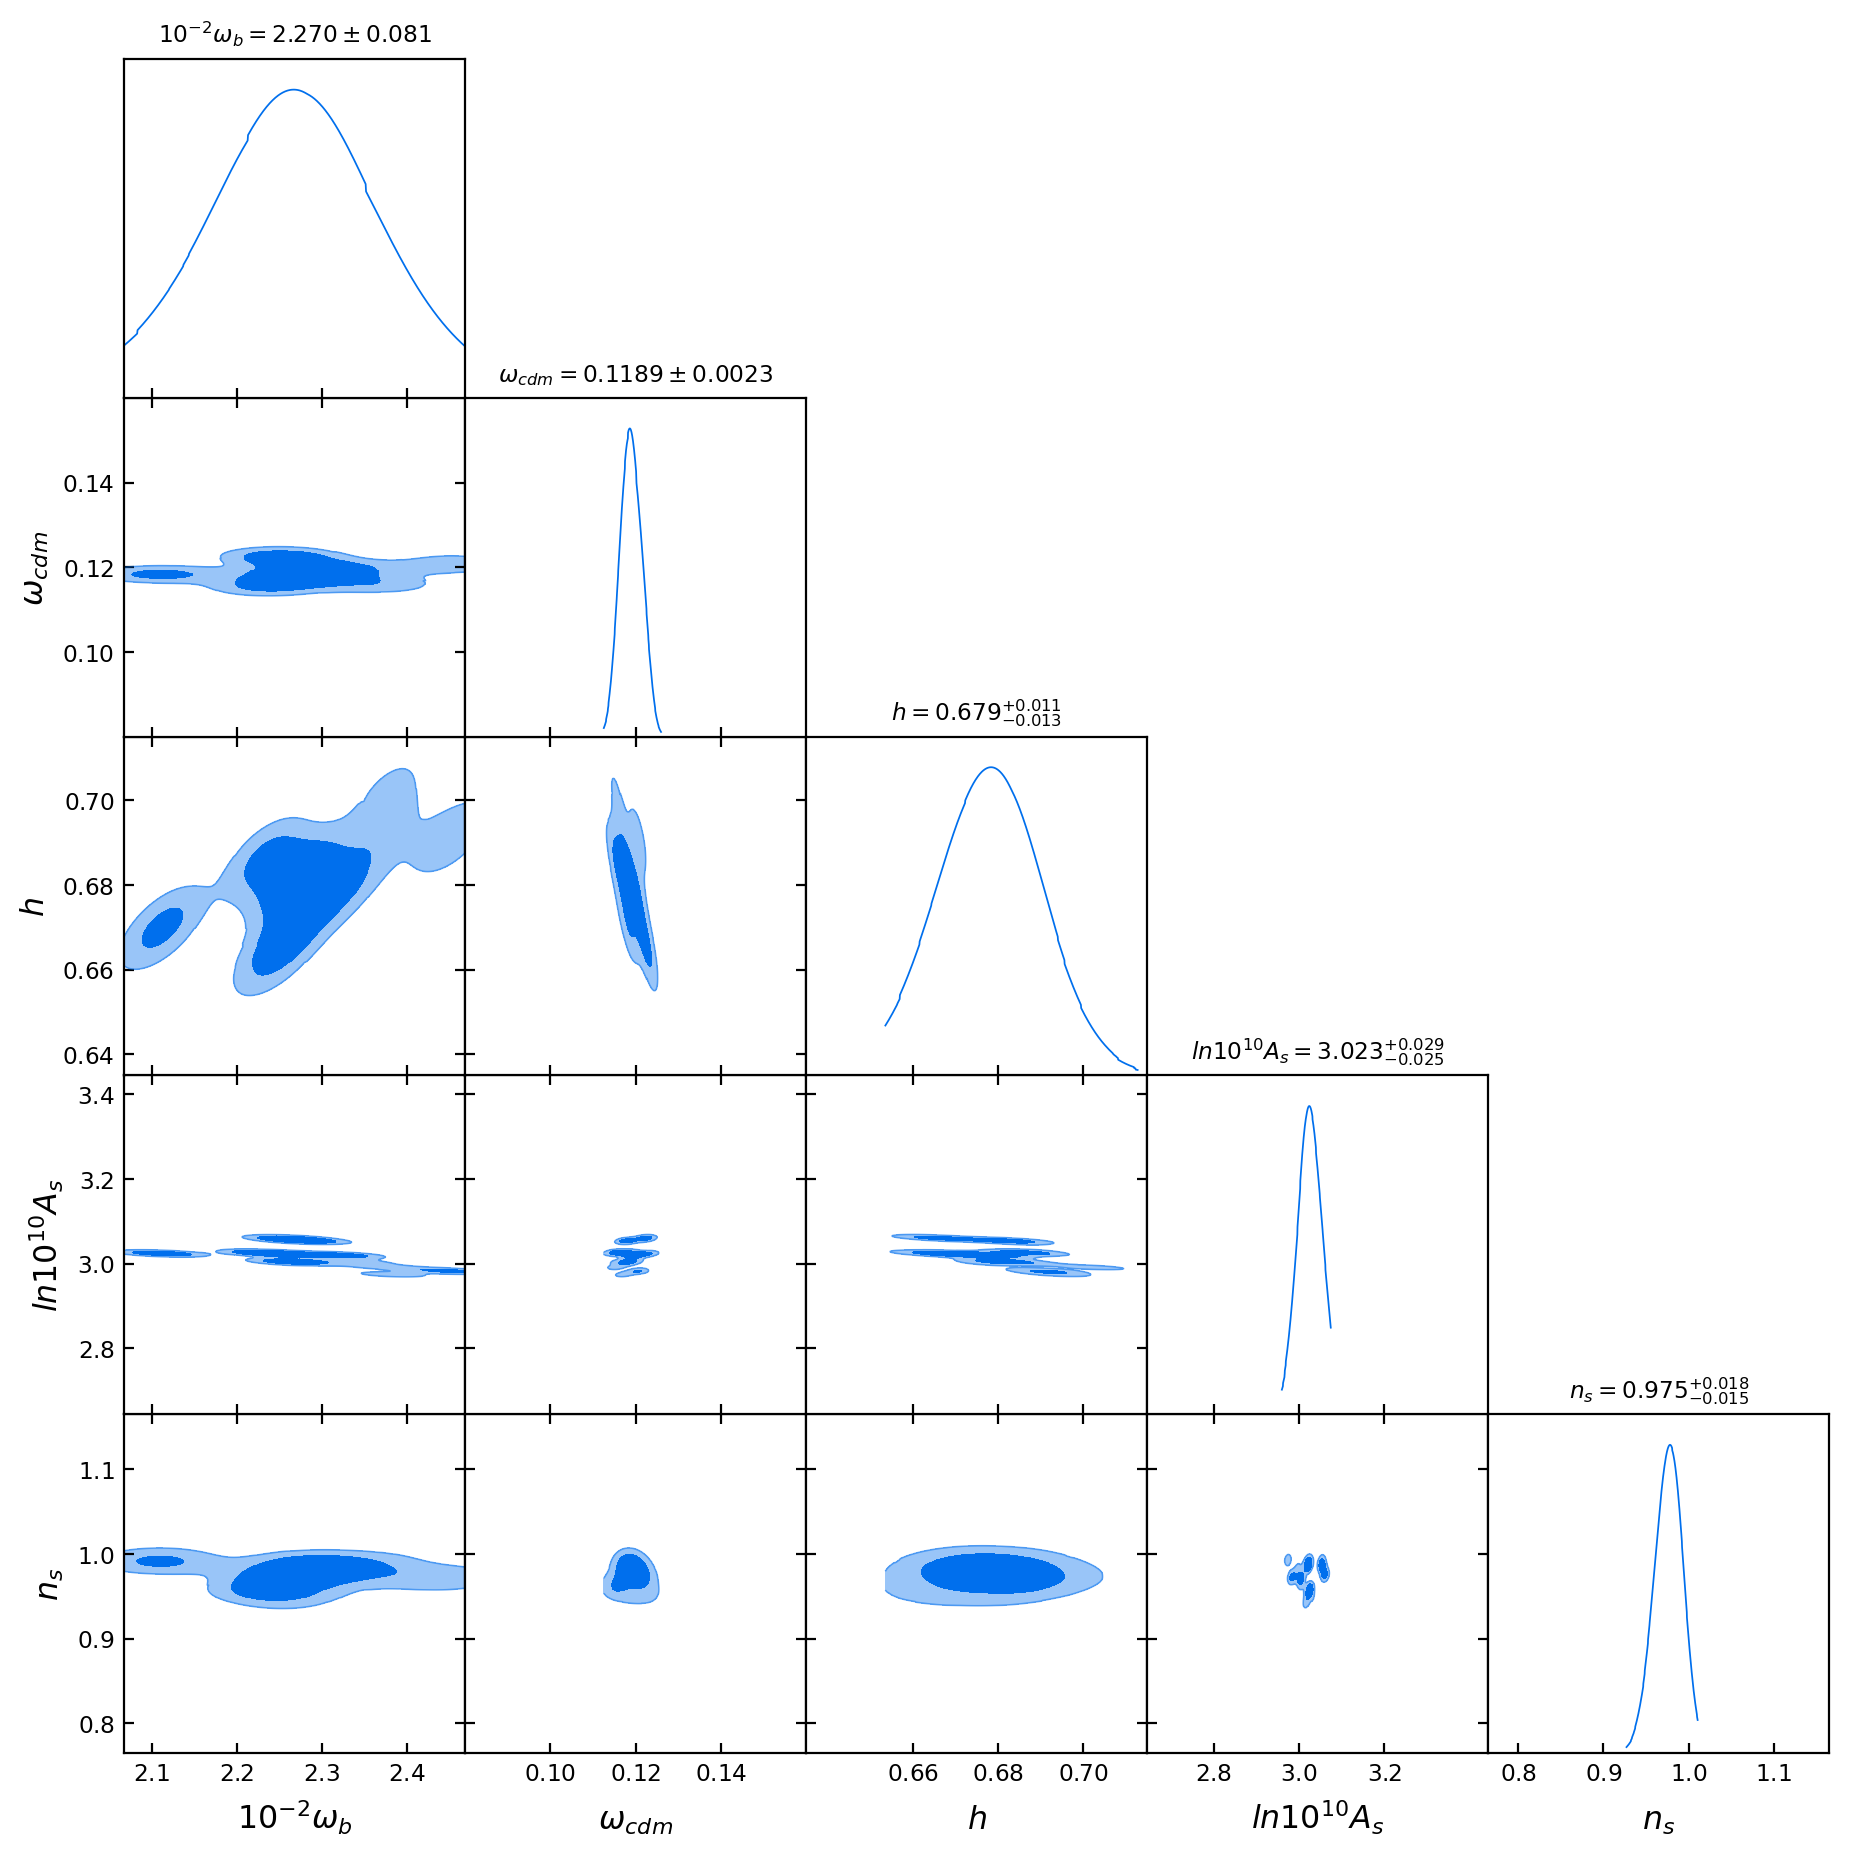

In [6]:
g = plots.getSubplotPlotter(width_inch=11)
g.settings.alpha_filled_add = 0.3
g.triangle_plot([prior1], params=params[:5], 
                filled=True, title_limit=1, param_limits=param_limits1)